<a href="https://colab.research.google.com/github/shydaparveen/-Generative-adversarial-network-GAN-/blob/main/Experiment_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df=pd.read_csv('/content/cars.csv')

In [7]:
rows, cols = df.shape    #q1
print(f"Rows: {rows}, Columns: {cols}")

Rows: 100, Columns: 13


In [8]:
print(df.dtypes)   #2

Car_ID                int64
Brand                object
Model                object
Year                  int64
Kilometers_Driven     int64
Fuel_Type            object
Transmission         object
Owner_Type           object
Mileage               int64
Engine                int64
Power                 int64
Seats                 int64
Price                 int64
dtype: object


In [9]:
missing_values = df.isnull().sum()  #3

missing_values = missing_values[missing_values > 0]

print(missing_values)

Series([], dtype: int64)


In [12]:
car_Prices = df["Price"]   #4

summary = {
    "mean": car_Prices.mean(),
    "median": car_Prices.median(),
    "min": car_Prices.min(),
    "max": car_Prices.max(),
    "skewness": car_Prices.skew()
}

print(summary)

{'mean': np.float64(1574000.0), 'median': 1300000.0, 'min': 450000, 'max': 4000000, 'skewness': np.float64(0.6142859340595381)}


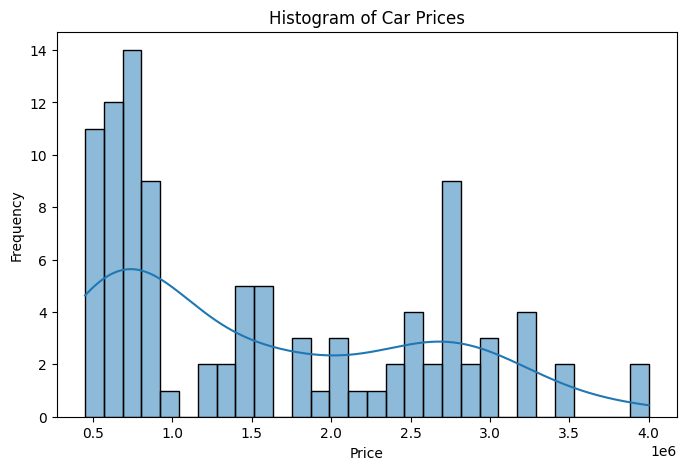

In [20]:
plt.figure(figsize=(8,5))
sns.histplot(df["Price"], bins=30, kde=True)

plt.title("Histogram of Car Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

In [17]:
Q1 = df["Price"].quantile(0.25)  #6
Q3 = df["Price"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df["Price"] < lower_bound) | (df["Price"] > upper_bound)]

print(f"Number of outliers: {len(outliers)}")
print(outliers["Price"].describe())

Number of outliers: 0
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Price, dtype: float64


In [22]:
Q1 = df["Price"].quantile(0.25)  #7
Q3 = df["Price"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
outliers = df[(df["Price"] < lower_bound) | (df["Price"] > upper_bound)]

print(f"Number of outliers: {len(outliers)}")
print("Outlier price range:")
print(outliers["Price"].describe())

Number of outliers: 0
Outlier price range:
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Price, dtype: float64


In [23]:
fuel_counts = df["Fuel_Type"].value_counts() #8

print(fuel_counts)
print("Most common Fuel_Type:", fuel_counts.idxmax())

Fuel_Type
Petrol    52
Diesel    48
Name: count, dtype: int64
Most common Fuel_Type: Petrol


In [25]:
avg_price_by_fuel = df.groupby("Fuel_Type")["Price"].mean().sort_values(ascending=False)  #9

print(avg_price_by_fuel)

Fuel_Type
Diesel    1.761458e+06
Petrol    1.400962e+06
Name: Price, dtype: float64


<Figure size 800x500 with 0 Axes>

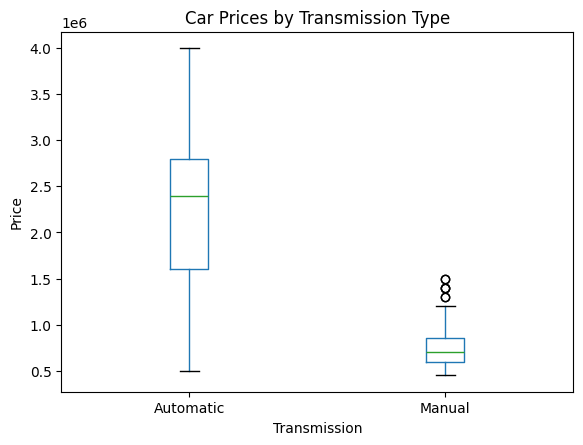

In [27]:
plt.figure(figsize=(8,5))
df.boxplot(column="Price", by="Transmission", grid=False)
plt.title("Car Prices by Transmission Type")
plt.suptitle("")  # removes the extra automatic title
plt.xlabel("Transmission")
plt.ylabel("Price")
plt.show()

In [31]:
avg_price_by_seller = df.groupby("Owner_Type")["Price"].mean().sort_values(ascending=False)

print(avg_price_by_seller)

Owner_Type
First     1.753409e+06
Second    1.687209e+06
Third     5.923077e+05
Name: Price, dtype: float64


In [33]:
avg_mileage = df["Kilometers_Driven"].mean()
print("Average mileage (Kilometers_Driven):", avg_mileage)

Average mileage (Kilometers_Driven): 28150.0


In [22]:
df.head()

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,1,Toyota,Corolla,2018,50000,Petrol,Manual,First,15,1498,108,5,800000
1,2,Honda,Civic,2019,40000,Petrol,Automatic,Second,17,1597,140,5,1000000
2,3,Ford,Mustang,2017,20000,Petrol,Automatic,First,10,4951,395,4,2500000
3,4,Maruti,Swift,2020,30000,Diesel,Manual,Third,23,1248,74,5,600000
4,5,Hyundai,Sonata,2016,60000,Diesel,Automatic,Second,18,1999,194,5,850000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Car_ID             100 non-null    int64 
 1   Brand              100 non-null    object
 2   Model              100 non-null    object
 3   Year               100 non-null    int64 
 4   Kilometers_Driven  100 non-null    int64 
 5   Fuel_Type          100 non-null    object
 6   Transmission       100 non-null    object
 7   Owner_Type         100 non-null    object
 8   Mileage            100 non-null    int64 
 9   Engine             100 non-null    int64 
 10  Power              100 non-null    int64 
 11  Seats              100 non-null    int64 
 12  Price              100 non-null    int64 
dtypes: int64(8), object(5)
memory usage: 10.3+ KB


In [6]:
df['Brand'].unique()

array(['Toyota', 'Honda', 'Ford', 'Maruti', 'Hyundai', 'Tata', 'Mahindra',
       'Volkswagen', 'Audi', 'BMW', 'Mercedes'], dtype=object)

In [7]:
from sklearn.preprocessing import LabelEncoder

In [15]:
le=LabelEncoder()

In [16]:
df

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,1,Toyota,Corolla,2018,50000,Petrol,Manual,First,15,1498,108,5,800000
1,2,Honda,Civic,2019,40000,Petrol,Automatic,Second,17,1597,140,5,1000000
2,3,Ford,Mustang,2017,20000,Petrol,Automatic,First,10,4951,395,4,2500000
3,4,Maruti,Swift,2020,30000,Diesel,Manual,Third,23,1248,74,5,600000
4,5,Hyundai,Sonata,2016,60000,Diesel,Automatic,Second,18,1999,194,5,850000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,Mercedes,C-Class,2019,22000,Diesel,Automatic,First,16,1950,191,5,2900000
96,97,Toyota,Innova Crysta,2017,38000,Diesel,Manual,Second,13,2755,171,7,1400000
97,98,Ford,EcoSport,2018,26000,Petrol,Manual,Third,18,1497,121,5,750000
98,99,Hyundai,Verna,2019,24000,Petrol,Automatic,Second,17,1497,113,5,850000


In [17]:
df['Brand']=le.fit_transform(df['Brand'])

In [18]:
le.fit_transform(df['Model'])

array([15, 14, 30, 42, 41, 31, 40, 33,  4, 53, 11, 20, 16, 27, 21, 13, 47,
       34,  1, 25, 28, 22, 50,  7, 44, 32,  6, 54, 17, 23,  9, 19, 38, 51,
       52,  8,  3,  2, 26, 57, 36, 39, 46, 37, 10, 43, 35, 55, 24, 12, 30,
       49, 45, 56, 48,  5,  0, 11, 29, 18, 50,  7, 44, 32,  6, 54, 17, 23,
        9, 19, 38, 51, 52,  8,  3,  2, 26, 57, 36, 39, 46, 37, 10, 43, 35,
       55, 24, 12, 30, 49, 45, 56, 48,  5,  0, 11, 29, 18, 50,  7])

In [19]:
df

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,1,9,Corolla,2018,50000,Petrol,Manual,First,15,1498,108,5,800000
1,2,3,Civic,2019,40000,Petrol,Automatic,Second,17,1597,140,5,1000000
2,3,2,Mustang,2017,20000,Petrol,Automatic,First,10,4951,395,4,2500000
3,4,6,Swift,2020,30000,Diesel,Manual,Third,23,1248,74,5,600000
4,5,4,Sonata,2016,60000,Diesel,Automatic,Second,18,1999,194,5,850000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,7,C-Class,2019,22000,Diesel,Automatic,First,16,1950,191,5,2900000
96,97,9,Innova Crysta,2017,38000,Diesel,Manual,Second,13,2755,171,7,1400000
97,98,2,EcoSport,2018,26000,Petrol,Manual,Third,18,1497,121,5,750000
98,99,4,Verna,2019,24000,Petrol,Automatic,Second,17,1497,113,5,850000


In [23]:
df['Transmission']=le.fit_transform(df['Transmission'])

In [24]:
df

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,1,Toyota,Corolla,2018,50000,Petrol,1,First,15,1498,108,5,800000
1,2,Honda,Civic,2019,40000,Petrol,0,Second,17,1597,140,5,1000000
2,3,Ford,Mustang,2017,20000,Petrol,0,First,10,4951,395,4,2500000
3,4,Maruti,Swift,2020,30000,Diesel,1,Third,23,1248,74,5,600000
4,5,Hyundai,Sonata,2016,60000,Diesel,0,Second,18,1999,194,5,850000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,Mercedes,C-Class,2019,22000,Diesel,0,First,16,1950,191,5,2900000
96,97,Toyota,Innova Crysta,2017,38000,Diesel,1,Second,13,2755,171,7,1400000
97,98,Ford,EcoSport,2018,26000,Petrol,1,Third,18,1497,121,5,750000
98,99,Hyundai,Verna,2019,24000,Petrol,0,Second,17,1497,113,5,850000


In [25]:
df['Owner_Type']=le.fit_transform(df['Owner_Type'])

In [26]:
df

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,1,Toyota,Corolla,2018,50000,Petrol,1,0,15,1498,108,5,800000
1,2,Honda,Civic,2019,40000,Petrol,0,1,17,1597,140,5,1000000
2,3,Ford,Mustang,2017,20000,Petrol,0,0,10,4951,395,4,2500000
3,4,Maruti,Swift,2020,30000,Diesel,1,2,23,1248,74,5,600000
4,5,Hyundai,Sonata,2016,60000,Diesel,0,1,18,1999,194,5,850000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,Mercedes,C-Class,2019,22000,Diesel,0,0,16,1950,191,5,2900000
96,97,Toyota,Innova Crysta,2017,38000,Diesel,1,1,13,2755,171,7,1400000
97,98,Ford,EcoSport,2018,26000,Petrol,1,2,18,1497,121,5,750000
98,99,Hyundai,Verna,2019,24000,Petrol,0,1,17,1497,113,5,850000


In [27]:
df['Fuel_Type']=le.fit_transform(df['Fuel_Type'])

In [28]:
df

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,1,Toyota,Corolla,2018,50000,1,1,0,15,1498,108,5,800000
1,2,Honda,Civic,2019,40000,1,0,1,17,1597,140,5,1000000
2,3,Ford,Mustang,2017,20000,1,0,0,10,4951,395,4,2500000
3,4,Maruti,Swift,2020,30000,0,1,2,23,1248,74,5,600000
4,5,Hyundai,Sonata,2016,60000,0,0,1,18,1999,194,5,850000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,Mercedes,C-Class,2019,22000,0,0,0,16,1950,191,5,2900000
96,97,Toyota,Innova Crysta,2017,38000,0,1,1,13,2755,171,7,1400000
97,98,Ford,EcoSport,2018,26000,1,1,2,18,1497,121,5,750000
98,99,Hyundai,Verna,2019,24000,1,0,1,17,1497,113,5,850000


In [29]:
df['Brand']=le.fit_transform(df['Brand'])

In [30]:
df

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,1,9,Corolla,2018,50000,1,1,0,15,1498,108,5,800000
1,2,3,Civic,2019,40000,1,0,1,17,1597,140,5,1000000
2,3,2,Mustang,2017,20000,1,0,0,10,4951,395,4,2500000
3,4,6,Swift,2020,30000,0,1,2,23,1248,74,5,600000
4,5,4,Sonata,2016,60000,0,0,1,18,1999,194,5,850000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,7,C-Class,2019,22000,0,0,0,16,1950,191,5,2900000
96,97,9,Innova Crysta,2017,38000,0,1,1,13,2755,171,7,1400000
97,98,2,EcoSport,2018,26000,1,1,2,18,1497,121,5,750000
98,99,4,Verna,2019,24000,1,0,1,17,1497,113,5,850000


In [31]:
df['Model']=le.fit_transform(df['Model'])

In [32]:
df

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,1,9,15,2018,50000,1,1,0,15,1498,108,5,800000
1,2,3,14,2019,40000,1,0,1,17,1597,140,5,1000000
2,3,2,30,2017,20000,1,0,0,10,4951,395,4,2500000
3,4,6,42,2020,30000,0,1,2,23,1248,74,5,600000
4,5,4,41,2016,60000,0,0,1,18,1999,194,5,850000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,7,11,2019,22000,0,0,0,16,1950,191,5,2900000
96,97,9,29,2017,38000,0,1,1,13,2755,171,7,1400000
97,98,2,18,2018,26000,1,1,2,18,1497,121,5,750000
98,99,4,50,2019,24000,1,0,1,17,1497,113,5,850000


{'whiskers': [<matplotlib.lines.Line2D at 0x789ecb3b0ec0>,
 'caps': [<matplotlib.lines.Line2D at 0x789ecb3b1670>,
 'boxes': [<matplotlib.lines.Line2D at 0x789ecb3289e0>],
 'medians': [<matplotlib.lines.Line2D at 0x789ecb3b1e80>],
 'fliers': [<matplotlib.lines.Line2D at 0x789ecb3b2240>],
 'means': []}

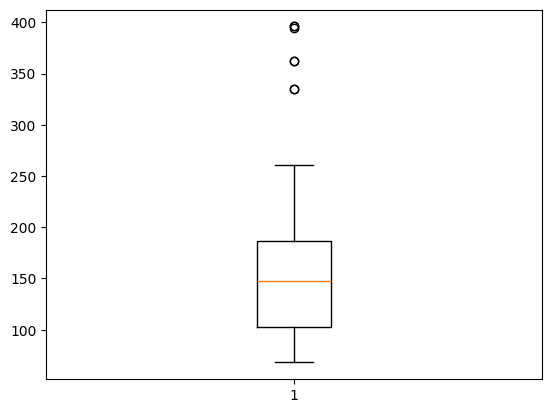

In [35]:
plt.boxplot(df['Power'])

{'whiskers': [<matplotlib.lines.Line2D at 0x789ecb377b60>,
 'caps': [<matplotlib.lines.Line2D at 0x789ecb3800b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x789ecb3779e0>],
 'medians': [<matplotlib.lines.Line2D at 0x789ecb380680>],
 'fliers': [<matplotlib.lines.Line2D at 0x789ecb3808f0>],
 'means': []}

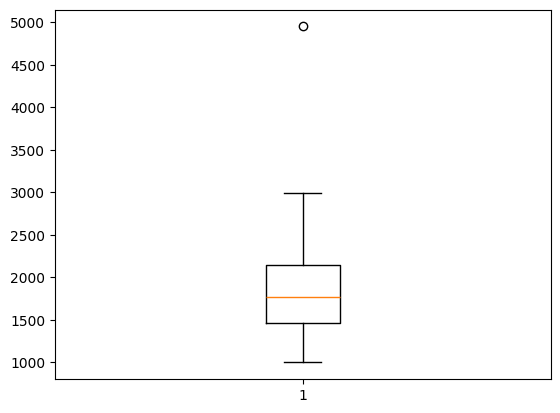

In [36]:
plt.boxplot(df['Engine'])

{'whiskers': [<matplotlib.lines.Line2D at 0x789ecb3799d0>,
 'caps': [<matplotlib.lines.Line2D at 0x789ecb379fd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x789ecb379760>],
 'medians': [<matplotlib.lines.Line2D at 0x789ecb37a4b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x789ecb37a7b0>],
 'means': []}

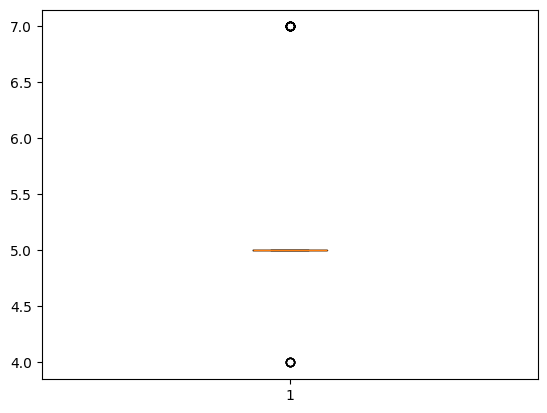

In [37]:
plt.boxplot(df['Seats'])

{'whiskers': [<matplotlib.lines.Line2D at 0x789ecb838410>,
 'caps': [<matplotlib.lines.Line2D at 0x789ecb8389b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x789ecb838170>],
 'medians': [<matplotlib.lines.Line2D at 0x789ecb838da0>],
 'fliers': [<matplotlib.lines.Line2D at 0x789ecb839040>],
 'means': []}

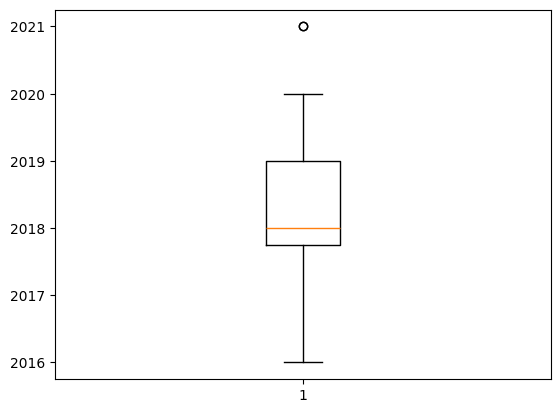

In [38]:
plt.boxplot(df['Year'])

In [39]:
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(0)
num_buyers=50
cars1=np.random.normal(70,10,num_buyers)
cars2=np.random.normal(75,15,num_buyers)

In [40]:
cars1

array([87.64052346, 74.00157208, 79.78737984, 92.40893199, 88.6755799 ,
       60.2272212 , 79.50088418, 68.48642792, 68.96781148, 74.10598502,
       71.44043571, 84.54273507, 77.61037725, 71.21675016, 74.43863233,
       73.33674327, 84.94079073, 67.94841736, 73.13067702, 61.45904261,
       44.47010184, 76.53618595, 78.64436199, 62.5783498 , 92.69754624,
       55.45634325, 70.45758517, 68.1281615 , 85.32779214, 84.6935877 ,
       71.54947426, 73.7816252 , 61.12214252, 50.19203532, 66.52087851,
       71.56348969, 82.30290681, 82.02379849, 66.12673183, 66.97697249,
       59.51447035, 55.79982063, 52.93729809, 89.50775395, 64.90347818,
       65.61925698, 57.4720464 , 77.77490356, 53.86102152, 67.8725972 ])

In [1]:
rows, cols = df.shape
print(f"Rows: {rows}, Columns: {cols}")

NameError: name 'df' is not defined

<Axes: >

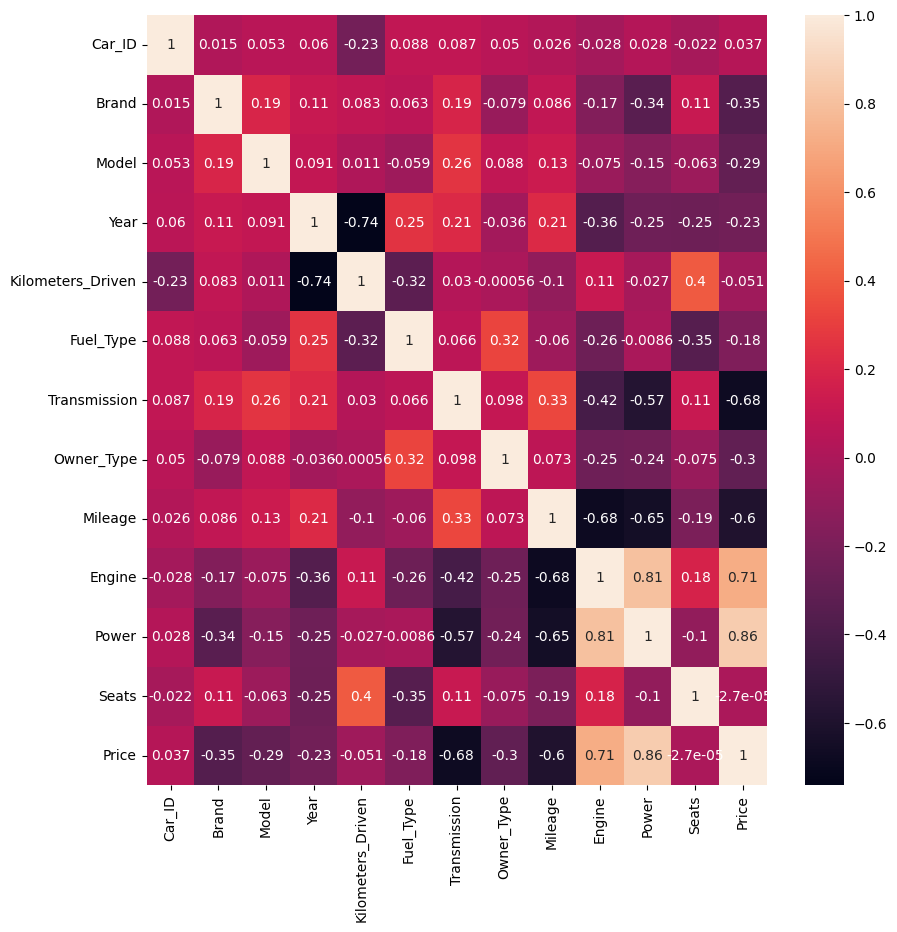

In [33]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True   )